# 1. Bussiness Understanding 

# 2. Data Understanding 

## 2.1 Import Libraries 

In [33]:
# ====== Data Handling ======
import pandas as pd
import numpy as np
import ast
from collections import Counter

# ====== Visualization ======
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ====== Preprocessing ======
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, PowerTransformer, QuantileTransformer

# ====== Regression & Tree Models ======
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from scipy.stats import randint, uniform

# ====== Clustering ======
from sklearn.cluster import KMeans

# ====== Correlation & Statistics ======
from scipy.stats import pearsonr, spearmanr

# ====== NLP ======
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bertopic import BERTopic

# ====== Geospatial ======
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from shapely.geometry import Point
from branca.element import Template, MacroElement, Element


# ====== Utilities ======
import warnings
warnings.filterwarnings("ignore")
import joblib
from joblib import dump
import pickle


from scipy.stats import randint, uniform

## 2.2 Loading the Data 

In [34]:
# Load the new datasets
future_calendar = pd.read_csv("Data/Future Calendar Rates.csv")
listings_v2 = pd.read_csv("Data/Listings (2).csv")
past_calendar = pd.read_csv("Data/Past Calendar Rates.csv")
reviews_v2 = pd.read_csv("Data/Reviews (2).csv")

# 3. Data Understanding 

### 3.1 check the first 5 rows of each data

In [35]:
# Display the first 5 rows of the future_calendar dataset
future_calendar.head()

,listing_id,date,vacant_days,reserved_days,occupancy,revenue,rate_avg,booked_rate_avg,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,native_booked_rate_avg,native_rate_avg,native_revenue
0,41759384,2025-11-01,30,0,0.0,0.0,54.0,NaN,NaN,NaN,2.0,NaN,6977.0,0.0
1,14535080,2026-01-01,31,0,0.0,0.0,9.7,NaN,NaN,NaN,28.0,NaN,1253.0,0.0
2,41759384,2026-07-01,31,0,0.0,0.0,53.5,NaN,NaN,NaN,NaN,NaN,6912.0,0.0
3,14535080,2025-12-01,31,0,0.0,0.0,9.7,NaN,NaN,NaN,28.0,NaN,1253.0,0.0
4,14535080,2026-08-01,31,0,0.0,0.0,10.3,NaN,NaN,NaN,28.0,NaN,1331.0,0.0


In [36]:
# Display the first 5 rows of the listings_v2 dataset
listings_v2.head()

,listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,...,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,471581,Located In a Serene Environment,Entire cottage,entire_home,https://a0.muscache.com/im/pictures/6434524/bc...,37,2280941,Bella,NaN,NaN,...,0.500,0.726,20.1,2594.2,29.1,3765.7,45,28,45,90
1,906958,Makena's Place Karen - Flamingo Room,Private room in cottage,private_room,https://a0.muscache.com/im/pictures/68ecc57f-d...,29,4856316,Chichi,NaN,NaN,...,0.111,0.147,5.8,753.7,7.7,997.5,10,22,80,90
2,1023556,Home in Langata 1 km to Nairobi National Park,Entire guesthouse,entire_home,https://a0.muscache.com/im/pictures/01cc7287-2...,20,5634522,Janet,NaN,NaN,...,0.044,0.000,0.9,112.0,0.0,0.0,4,0,86,90
3,1237886,Hob House,Room in bed and breakfast,hotel_room,https://a0.muscache.com/im/pictures/cbdab7e1-f...,8,6748840,NaN,NaN,NaN,...,0.056,0.000,6.9,890.1,0.0,0.0,5,0,85,90
4,1803821,Makena's Place Karen - All Rooms,Private room in cottage,private_room,https://a0.muscache.com/im/pictures/786899c5-b...,58,4856316,Chichi,NaN,NaN,...,0.044,0.055,5.6,727.9,6.9,897.4,4,17,86,90


In [37]:
# Display the first 5 rows of the past_calendar dataset
past_calendar.head()

,listing_id,date,vacant_days,reserved_days,occupancy,revenue,rate_avg,booked_rate_avg,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,native_booked_rate_avg,native_rate_avg,native_revenue
0,21520917,2024-12-01,22,9,0.29,345.0,37.6,38.3,5.0,9.0,NaN,4960.0,4869.0,44680.0
1,39875956,2025-08-01,31,0,0.00,0.0,69.1,NaN,NaN,NaN,1.0,NaN,8928.0,0.0
2,36253079,2025-04-01,30,0,0.00,0.0,33.7,NaN,NaN,NaN,1.0,NaN,4364.0,0.0
3,40675899,2024-09-01,24,6,0.20,243.0,40.2,40.5,1.0,9.0,NaN,5232.0,5193.0,31391.0
4,21520917,2025-01-01,31,0,0.00,0.0,37.2,NaN,NaN,NaN,1.0,NaN,4805.0,0.0


In [38]:
# Display the first 5 rows of the past_calendar dataset
reviews_v2.head()

,listing_id,date,num_reviews,reviewers
0,16701882,2025-04-01,1,341960500
1,37808882,2025-05-01,1,424270789
2,13381106,2024-10-01,3,"5995258,172444062,74140354"
3,37808882,2025-07-01,1,381061119
4,471581,2025-06-01,1,138579311


### 3.2 check the columns and the shape of the data 

In [39]:
# Check shape and columns for each dataset
datasets = {
    "future_calendar": future_calendar,
    "listings_v2": listings_v2,
    "past_calendar": past_calendar,
    "reviews_v2": reviews_v2
}

for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.tolist())



future_calendar:
Shape: (3480, 14)
Columns: ['listing_id', 'date', 'vacant_days', 'reserved_days', 'occupancy', 'revenue', 'rate_avg', 'booked_rate_avg', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'native_booked_rate_avg', 'native_rate_avg', 'native_revenue']

listings_v2:
Shape: (300, 61)
Columns: ['listing_id', 'listing_name', 'listing_type', 'room_type', 'cover_photo_url', 'photos_count', 'host_id', 'host_name', 'cohost_ids', 'cohost_names', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms', 'beds', 'baths', 'registration', 'amenities', 'instant_book', 'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee', 'extra_guest_fee', 'num_reviews', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native', 'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy', 'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native', 'ttm_adjusted_rev

### 3.3 Summary Statistics 

In [40]:
# Summary statistics for each dataset
print("📊 Future Calendar Summary\n", future_calendar.describe(include='all').T)
print("\n📊 Listings Summary\n", listings_v2.describe(include='all').T)
print("\n📊 Past Calendar Summary\n", past_calendar.describe(include='all').T)
print("\n📊 Reviews Summary\n", reviews_v2.describe(include='all').T)

📊 Future Calendar Summary
                          count unique         top freq             mean  \
listing_id              3480.0    NaN         NaN  NaN  27742328.955172   
date                      3480     12  2025-11-01  290              NaN   
vacant_days             3480.0    NaN         NaN  NaN        28.672414   
reserved_days           3480.0    NaN         NaN  NaN         1.744253   
occupancy               3480.0    NaN         NaN  NaN         0.057449   
revenue                 3480.0    NaN         NaN  NaN       100.619828   
rate_avg                3480.0    NaN         NaN  NaN        57.618218   
booked_rate_avg          389.0    NaN         NaN  NaN        73.882005   
booking_lead_time_avg    243.0    NaN         NaN  NaN       124.893004   
length_of_stay_avg       243.0    NaN         NaN  NaN        18.255144   
min_nights_avg          3283.0    NaN         NaN  NaN         2.353945   
native_booked_rate_avg   389.0    NaN         NaN  NaN       9545.81491  

### 3.4 Check for Missing Values in both Counts and Percentage 

In [41]:
# Function to check missing values in count and percentage
def missing_values_summary(df):
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percent.round(2)
    })
    return missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

# Check missing values for each dataset
print("Future Calendar Missing Values:")
display(missing_values_summary(future_calendar))

print("\nListings_v2 Missing Values:")
display(missing_values_summary(listings_v2))

print("\nPast Calendar Missing Values:")
display(missing_values_summary(past_calendar))

print("\nReviews_v2 Missing Values:")
display(missing_values_summary(reviews_v2))


Future Calendar Missing Values:


,Missing Count,Missing Percentage
booking_lead_time_avg,3237,93.02
length_of_stay_avg,3237,93.02
booked_rate_avg,3091,88.82
native_booked_rate_avg,3091,88.82
min_nights_avg,197,5.66



Listings_v2 Missing Values:


,Missing Count,Missing Percentage
cohost_names,225,75.00
cohost_ids,225,75.00
bedrooms,51,17.00
guests,42,14.00
instant_book,23,7.67
extra_guest_fee,21,7.00
rating_value,10,3.33
rating_accuracy,10,3.33
rating_location,10,3.33
rating_communication,10,3.33



Past Calendar Missing Values:


,Missing Count,Missing Percentage
booking_lead_time_avg,1874,52.91
length_of_stay_avg,1874,52.91
booked_rate_avg,1667,47.06
native_booked_rate_avg,1667,47.06
min_nights_avg,1162,32.81



Reviews_v2 Missing Values:


,Missing Count,Missing Percentage


### 3.5 Check for unique values 

In [42]:
# Function to check unique values per column
def unique_values_summary(df):
    unique_counts = df.nunique()
    unique_summary = pd.DataFrame({
        'Unique Values Count': unique_counts
    })
    return unique_summary.sort_values(by='Unique Values Count', ascending=False)

# ================================
# Check unique values per dataset
# ================================

print("🔹 Future Calendar Unique Values:")
display(unique_values_summary(future_calendar))

print("\n🔹 Listings_v2 Unique Values:")
display(unique_values_summary(listings_v2))

print("\n🔹 Past Calendar Unique Values:")
display(unique_values_summary(past_calendar))

print("\n🔹 Reviews_v2 Unique Values:")
display(unique_values_summary(reviews_v2))


🔹 Future Calendar Unique Values:


,Unique Values Count
rate_avg,1033
native_rate_avg,1033
revenue,352
native_revenue,352
booked_rate_avg,302
native_booked_rate_avg,302
listing_id,290
booking_lead_time_avg,159
occupancy,59
length_of_stay_avg,49



🔹 Listings_v2 Unique Values:


,Unique Values Count
listing_id,300
ttm_revpar_native,300
ttm_avg_rate_native,300
ttm_revenue_native,300
listing_name,299
...,...
registration,2
superhost,2
ttm_total_days,1
currency,1



🔹 Past Calendar Unique Values:


,Unique Values Count
native_rate_avg,2368
native_revenue,1681
native_booked_rate_avg,1468
rate_avg,1061
revenue,1043
booked_rate_avg,822
listing_id,300
booking_lead_time_avg,169
occupancy,87
length_of_stay_avg,58



🔹 Reviews_v2 Unique Values:


,Unique Values Count
reviewers,975
listing_id,242
date,12
num_reviews,10


### 3.6 Check data types 

In [43]:
# Function to check data types
def datatypes_summary(df):
    dtypes_summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum()
    })
    return dtypes_summary

# ================================
# Check data types per dataset
# ================================

print("🔹 Future Calendar Data Types:")
display(datatypes_summary(future_calendar))

print("\n🔹 Listings_v2 Data Types:")
display(datatypes_summary(listings_v2))

print("\n🔹 Past Calendar Data Types:")
display(datatypes_summary(past_calendar))

print("\n🔹 Reviews_v2 Data Types:")
display(datatypes_summary(reviews_v2))



🔹 Future Calendar Data Types:


,Data Type,Non-Null Count,Null Count
listing_id,int64,3480,0
date,object,3480,0
vacant_days,int64,3480,0
reserved_days,int64,3480,0
occupancy,float64,3480,0
revenue,float64,3480,0
rate_avg,float64,3480,0
booked_rate_avg,float64,389,3091
booking_lead_time_avg,float64,243,3237
length_of_stay_avg,float64,243,3237



🔹 Listings_v2 Data Types:


,Data Type,Non-Null Count,Null Count
listing_id,int64,300,0
listing_name,object,300,0
listing_type,object,300,0
room_type,object,300,0
cover_photo_url,object,300,0
...,...,...,...
l90d_adjusted_revpar_native,float64,300,0
l90d_reserved_days,int64,300,0
l90d_blocked_days,int64,300,0
l90d_available_days,int64,300,0



🔹 Past Calendar Data Types:


,Data Type,Non-Null Count,Null Count
listing_id,int64,3542,0
date,object,3542,0
vacant_days,int64,3542,0
reserved_days,int64,3542,0
occupancy,float64,3542,0
revenue,float64,3542,0
rate_avg,float64,3542,0
booked_rate_avg,float64,1875,1667
booking_lead_time_avg,float64,1668,1874
length_of_stay_avg,float64,1668,1874



🔹 Reviews_v2 Data Types:


,Data Type,Non-Null Count,Null Count
listing_id,int64,997,0
date,object,997,0
num_reviews,int64,997,0
reviewers,object,997,0


# 4. Data Cleaning 

In [44]:
import pandas as pd

# ==============
# Data Cleaning
# ==============

def clean_dataframe(df, dataset_name):
    print(f"\n🔹 Cleaning {dataset_name}...")

    # 1. Remove duplicates
    df = df.drop_duplicates()
    print(f"Removed duplicates → New shape: {df.shape}")

    # 2. Handle missing values
    for col in df.columns:
        if df[col].dtype == 'object':  
            # Fill categorical/text missing values with "Unknown"
            df[col] = df[col].fillna("Unknown").str.strip().str.lower()
        elif pd.api.types.is_numeric_dtype(df[col]):
            # Fill numeric missing values with median
            df[col] = df[col].fillna(df[col].median())
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            # Fill missing dates with earliest date
            df[col] = df[col].fillna(df[col].min())

    # 3. Convert data types
    for col in df.columns:
        # Convert dates
        if "date" in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')

        # Convert numeric-looking strings
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='ignore')

    print(f"Finished cleaning {dataset_name}.")
    return df


# Apply cleaning function to each dataset
future_calendar = clean_dataframe(future_calendar, "Future Calendar")
listings_v2 = clean_dataframe(listings_v2, "Listings V2")
past_calendar = clean_dataframe(past_calendar, "Past Calendar")
reviews_v2 = clean_dataframe(reviews_v2, "Reviews V2")



🔹 Cleaning Future Calendar...
Removed duplicates → New shape: (3480, 14)
Finished cleaning Future Calendar.

🔹 Cleaning Listings V2...
Removed duplicates → New shape: (300, 61)
Finished cleaning Listings V2.

🔹 Cleaning Past Calendar...
Removed duplicates → New shape: (3542, 14)
Finished cleaning Past Calendar.

🔹 Cleaning Reviews V2...
Removed duplicates → New shape: (997, 4)
Finished cleaning Reviews V2.


### 4.1 Merge the Data 

In [45]:
# 1. Merge reviews into listings
listings_reviews = listings_v2.merge(reviews_v2, on="listing_id", how="left")

# 2. Combine past and future calendar
calendar_all = pd.concat([past_calendar, future_calendar], axis=0)

# 3. Merge calendar with listings + reviews
master_df = listings_reviews.merge(calendar_all, on="listing_id", how="left")

# 4. Check result
print("Master dataset shape:", master_df.shape)
print("Master dataset columns:", master_df.columns.tolist())


Master dataset shape: (25117, 77)
Master dataset columns: ['listing_id', 'listing_name', 'listing_type', 'room_type', 'cover_photo_url', 'photos_count', 'host_id', 'host_name', 'cohost_ids', 'cohost_names', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms', 'beds', 'baths', 'registration', 'amenities', 'instant_book', 'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee', 'extra_guest_fee', 'num_reviews_x', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native', 'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy', 'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native', 'ttm_adjusted_revpar', 'ttm_adjusted_revpar_native', 'ttm_reserved_days', 'ttm_blocked_days', 'ttm_available_days', 'ttm_total_days', 'l90d_revenue', 'l90d_revenue_native', 'l90d_avg_rate', 'l90d_avg_rate_native', 'l90d_occupancy', 'l90d_adjusted_occupancy', 'l90d_revpar', 'l90d_

# 5. Exploratory Data Analysis

### 5.1 Univariate Analysis

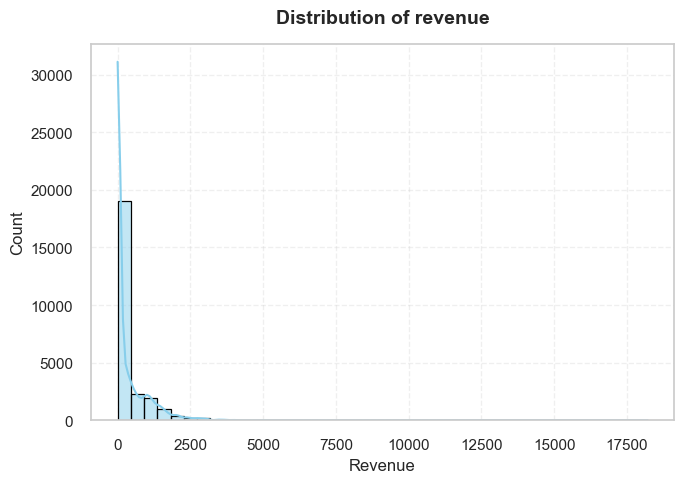

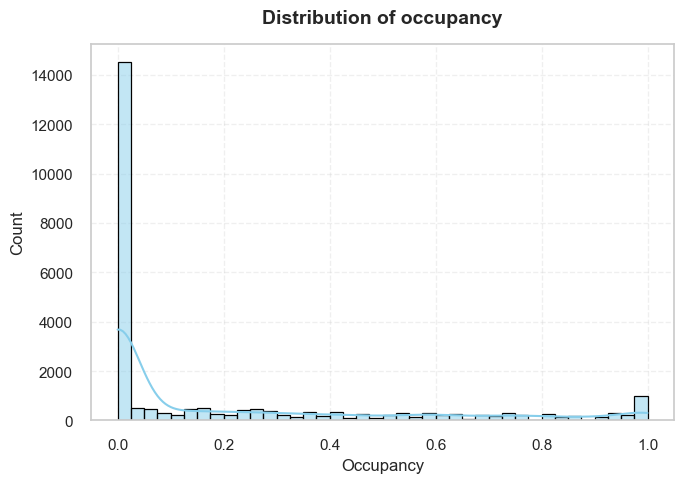

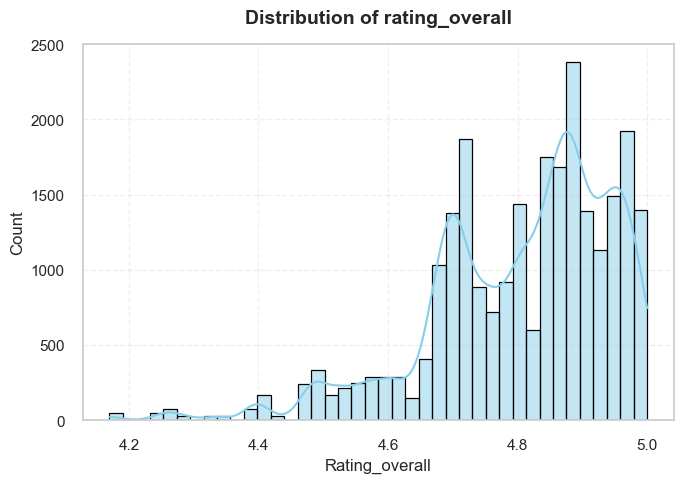

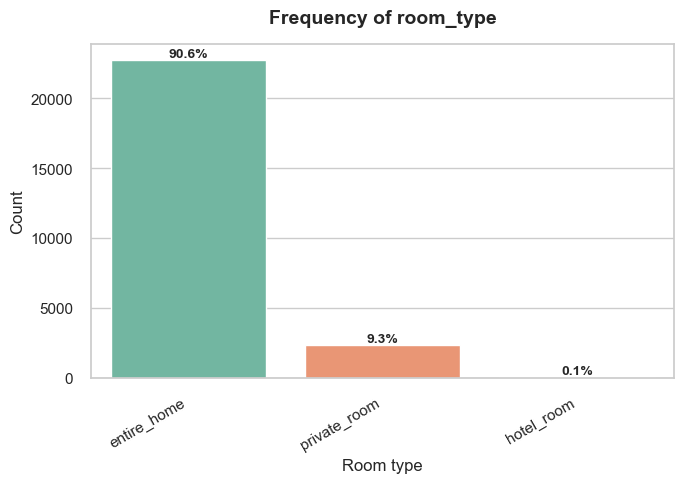

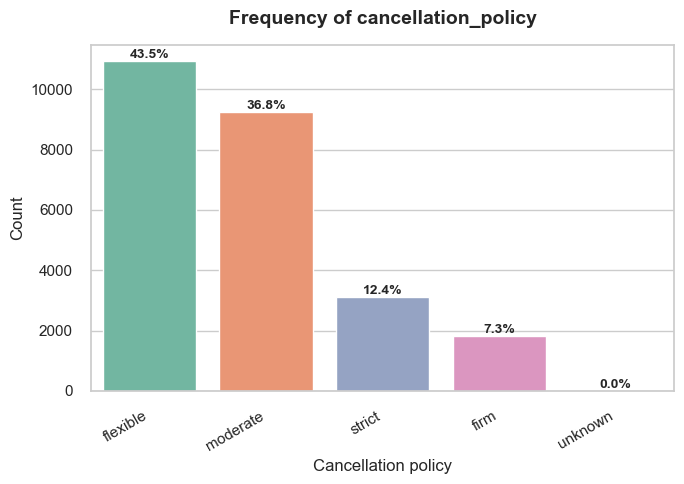

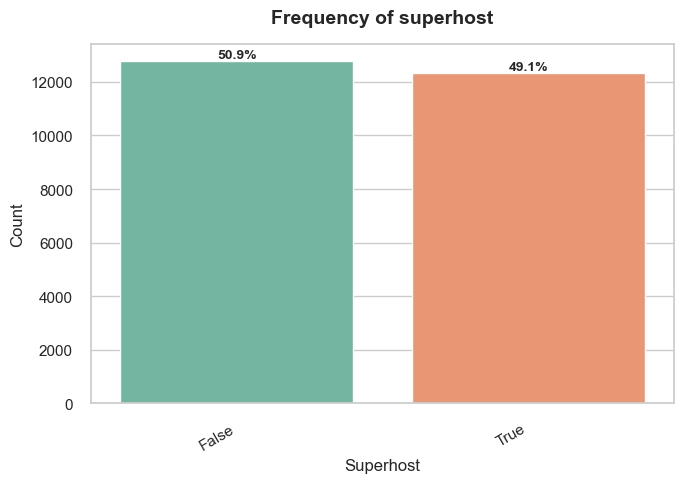

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set_theme(style="whitegrid")

# -------------------------------
# Numerical distributions
# -------------------------------
num_cols = ["revenue", "occupancy", "rating_overall"]

for col in num_cols:
    plt.figure(figsize=(7,5))
    sns.histplot(master_df[col], kde=True, bins=40, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {col}", fontsize=14, fontweight="bold", pad=15)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.grid(alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.show()


# -------------------------------
# Categorical frequency counts
# -------------------------------
cat_cols = ["room_type", "cancellation_policy", "superhost"]

for col in cat_cols:
    plt.figure(figsize=(7,5))
    ax = sns.countplot(
        data=master_df,
        x=col,
        order=master_df[col].value_counts().index,
        palette="Set2"
    )

    # Add percentages on top of bars
    total = len(master_df[col])
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / total:.1f}%"
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight="bold")

    plt.title(f"Frequency of {col}", fontsize=14, fontweight="bold", pad=15)
    plt.xlabel(col.replace("_", " ").capitalize(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


### 5.2 Bivariate Analysis

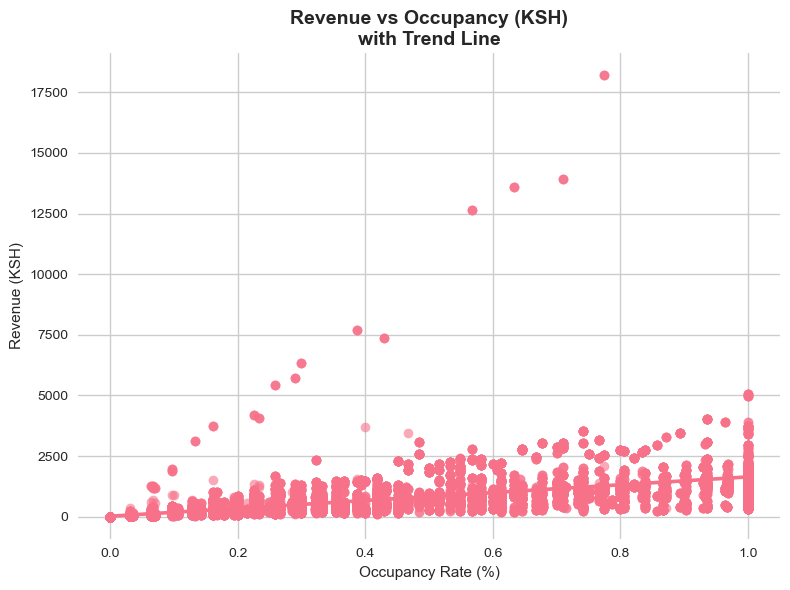

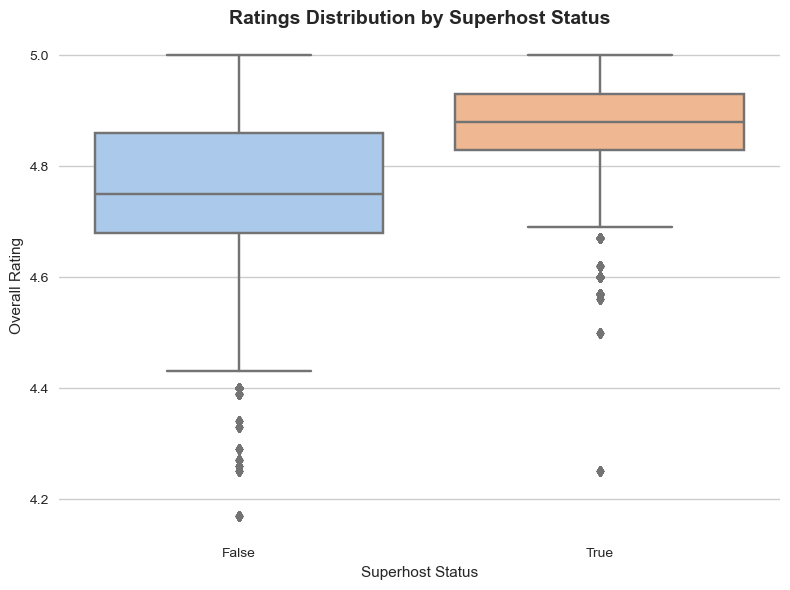

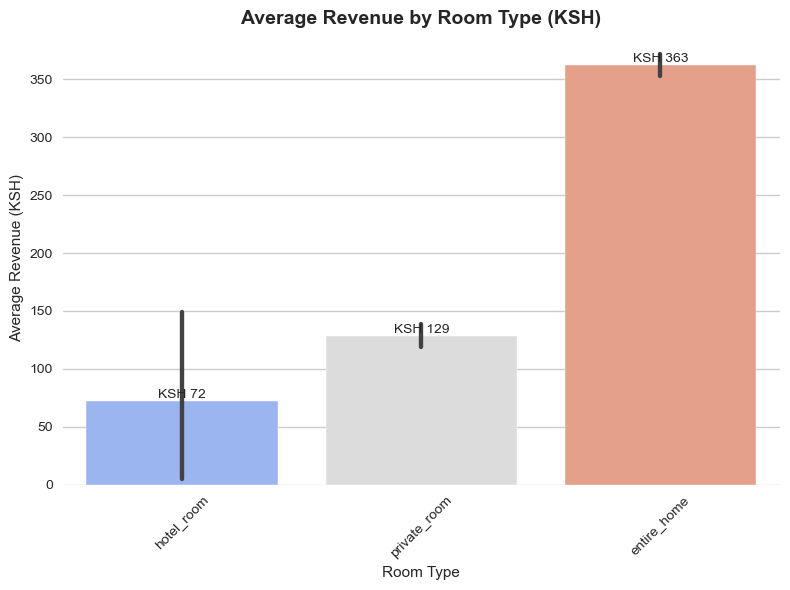

In [62]:
# Improved individual plots with KSH currency
def create_enhanced_plots_ksh(df):
    # Set style
    sns.set_style("whitegrid")
    plt.rcParams['figure.dpi'] = 100
    
    # Plot 1: Revenue vs Occupancy
    plt.figure(figsize=(8, 6))
    sns.regplot(data=df, x="occupancy", y="revenue", scatter_kws={'alpha':0.6})
    plt.title("Revenue vs Occupancy (KSH)\nwith Trend Line", fontsize=14, fontweight='bold')
    plt.xlabel("Occupancy Rate (%)")
    plt.ylabel("Revenue (KSH)")
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Ratings vs Superhost
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="superhost", y="rating_overall", palette="pastel")
    plt.title("Ratings Distribution by Superhost Status", fontsize=14, fontweight='bold')
    plt.xlabel("Superhost Status")
    plt.ylabel("Overall Rating")
    plt.tight_layout()
    plt.show()
    
    # Plot 3: Room type vs Average Revenue
    plt.figure(figsize=(8, 6))
    room_order = df.groupby('room_type')['revenue'].mean().sort_values().index
    ax = sns.barplot(data=df, x="room_type", y="revenue", estimator='mean', 
                    order=room_order, palette="coolwarm")
    plt.title("Average Revenue by Room Type (KSH)", fontsize=14, fontweight='bold')
    plt.xlabel("Room Type")
    plt.ylabel("Average Revenue (KSH)")
    plt.xticks(rotation=45)
    
    # Add value labels with KSH format
    for p in ax.patches:
        ax.annotate(f'KSH {p.get_height():,.0f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

create_enhanced_plots_ksh(master_df)

### 5.3 Time-based Analysis

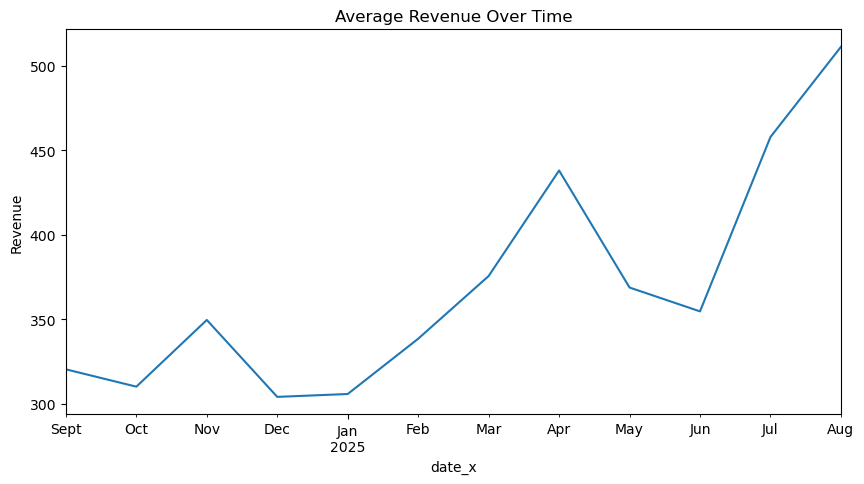

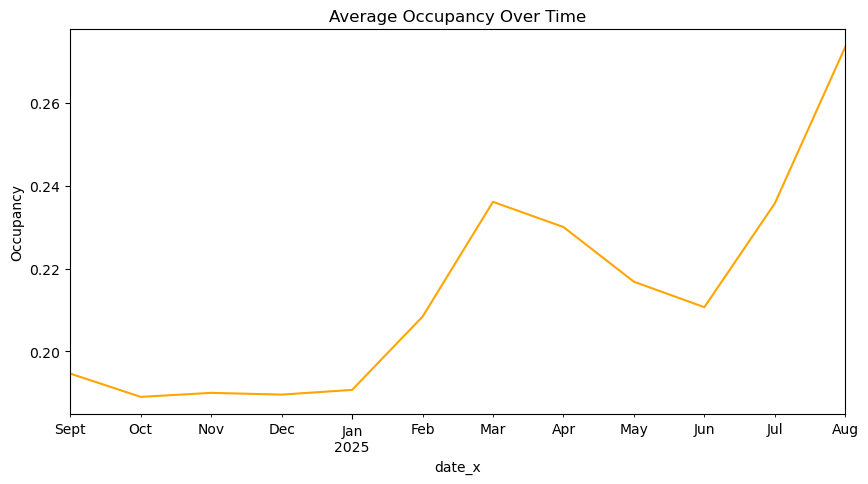

In [52]:
# Convert date if not already
master_df["date_x"] = pd.to_datetime(master_df["date_x"], errors='coerce')

# Revenue over time
plt.figure(figsize=(10,5))
master_df.groupby("date_x")["revenue"].mean().plot()
plt.title("Average Revenue Over Time")
plt.ylabel("Revenue")
plt.show()

# Occupancy over time
plt.figure(figsize=(10,5))
master_df.groupby("date_x")["occupancy"].mean().plot(color="orange")
plt.title("Average Occupancy Over Time")
plt.ylabel("Occupancy")
plt.show()


### 5.4 Correlation Analysis

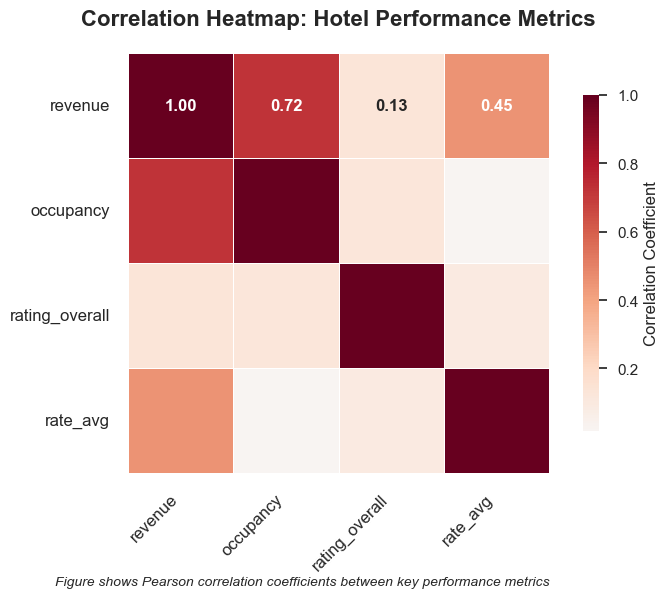

In [67]:
plt.figure(figsize=(8, 6))

# Create the correlation matrix
corr_matrix = master_df[["revenue", "occupancy", "rating_overall", "rate_avg"]].corr()

# Create heatmap with improved styling
heatmap = sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="RdBu_r",  # Better color scheme for correlations
            fmt=".2f", 
            center=0,  # Center colormap at 0
            square=True,  # Square cells
            linewidths=0.5,  # Add grid lines
            linecolor='white',  # White grid lines
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            annot_kws={"size": 12, "weight": "bold"})  # Better annotation styling

# Improve title and labels
plt.title("Correlation Heatmap: Hotel Performance Metrics", 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add a descriptive caption if needed
plt.figtext(0.5, 0.01, "Figure shows Pearson correlation coefficients between key performance metrics", 
           ha="center", fontsize=10, style='italic')

plt.show()

### 5.5 Geospatial Analysis

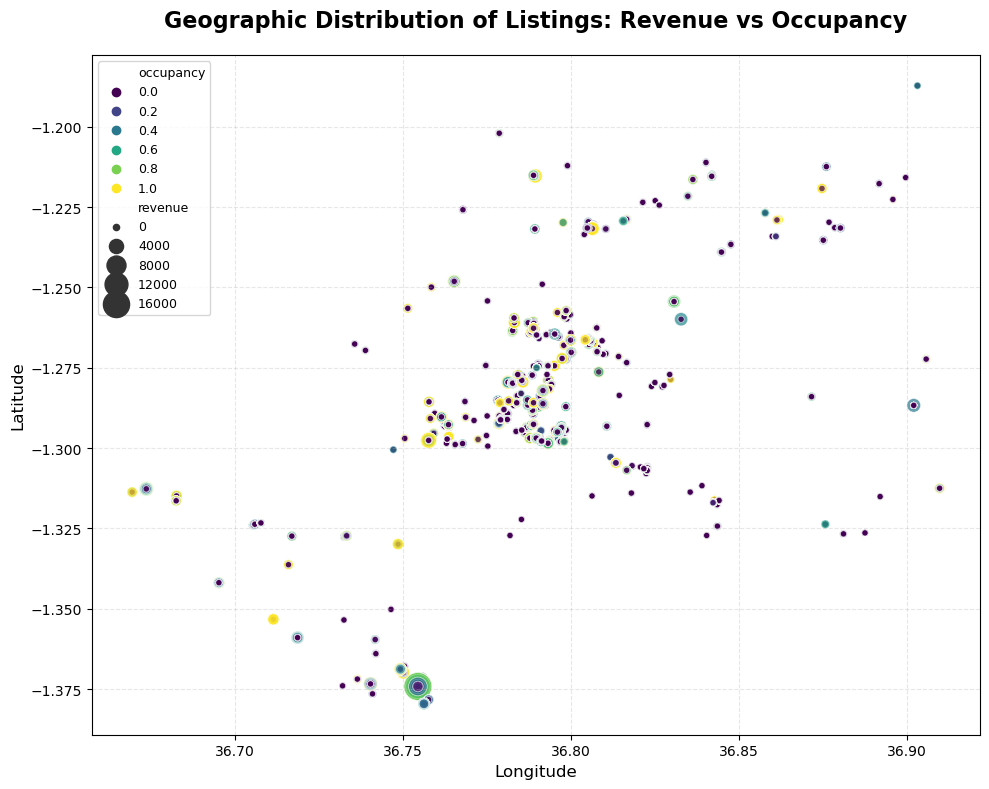

In [55]:
plt.figure(figsize=(10, 8))

# Create the scatter plot with improved parameters
scatter = sns.scatterplot(
    data=master_df, 
    x="longitude", 
    y="latitude",
    size="revenue", 
    hue="occupancy", 
    alpha=0.7, 
    palette="viridis",
    sizes=(20, 400),  # Control the size range explicitly
    edgecolor='white',  # Add white edges for better distinction
    linewidth=0.5
)

# Improve title and labels
plt.title("Geographic Distribution of Listings: Revenue vs Occupancy", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Improve legend
plt.legend(
    title_fontsize=10,
    fontsize=9,
    frameon=True,
    fancybox=True,
    framealpha=0.8,
    loc='best'  # Automatically choose best position
)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Improve colorbar if needed (optional)
# plt.colorbar(scatter, label='Occupancy Rate')

plt.show()